<a href="https://colab.research.google.com/github/maliksalman55/Classifications-models/blob/main/Classifications_Vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [19]:
import os
import shutil

src_path = '/content/drive/MyDrive/Project/kaggle.json'
dest_directory = '/root/.kaggle/'

In [20]:
# Create the destination directory if it doesn't exist
os.makedirs(dest_directory, exist_ok=True)

In [21]:
# Copy the Kaggle JSON file to the destination
shutil.copy(src_path, dest_directory)

'/root/.kaggle/kaggle.json'

In [22]:
# run this for dataset download
!kaggle datasets download -d markdaniellampa/fish-dataset


100% 1.58G/1.58G [00:53<00:00, 41.3MB/s]
100% 1.58G/1.58G [00:53<00:00, 31.6MB/s]


In [24]:
# unzip download file
import zipfile
zip_ref = zipfile.ZipFile ('/content/fish-dataset.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/train', # I pass and use train dataset path.
    labels="inferred", # because we hv labels dataset.
    label_mode="categorical",   # we use categorical became we hv more then 2 classes
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,# if we need to rotate image then put seed value.
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 8809 files belonging to 31 classes.


In [27]:
#Validation Image Preprocessing
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/FishImgDataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224,224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2751 files belonging to 31 classes.


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = '/content/drive/MyDrive/Project/Bangus 11.jpg'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# find image size
import PIL
from PIL import Image
img = PIL.Image.open("/content/drive/MyDrive/Project/Bangus 11.jpg")
width, height = img.size
print(width,'x',height)

323 x 156


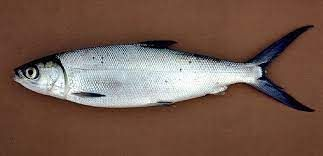

In [ ]:
# Display that iamge
from IPython.display import Image
image_path = '/content/drive/MyDrive/Project/Bangus 11.jpg'
# Display the image
Image(filename=image_path)

In [ ]:
from PIL import Image

def resize_and_save_image(image_path, output_path, target_size=(224, 224)):

    try:
        # Open the image file
        image = Image.open(image_path)

        # Resize the image
        resized_image = image.resize(target_size)

        # Save the resized image to the given output path
        resized_image.save(output_path)

        print(f"Resized image saved to {output_path}")
    except Exception as e:
        print(f"Error: {e}")

 # Example usage
input_image_path = "/content/drive/MyDrive/Project/Bangus 11.jpg"  # Change this to  input image path
output_image_path = "/content/drive/MyDrive/Project/Bangus 11.jpg"  # Change this to desired output image path


In [ ]:
# Resize the image and save it to the output path
resize_and_save_image(input_image_path, output_image_path)


Resized image saved to /content/drive/MyDrive/Project/Bangus 11.jpg


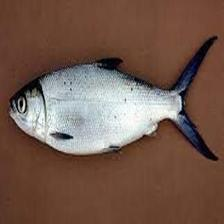

In [ ]:
from IPython.display import Image

# Path to your resized image file in Google Drive
resized_image_path = '/content/drive/MyDrive/resized_image.jpg'

# Display the resized image
Image(filename=output_image_path)

In [ ]:
#shuffling
import matplotlib.pyplot as plt
# Get the class names from the training set
class_names = training_set.class_names

In [ ]:
# Display the class names
print("Class Names:", class_names)

Class Names: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


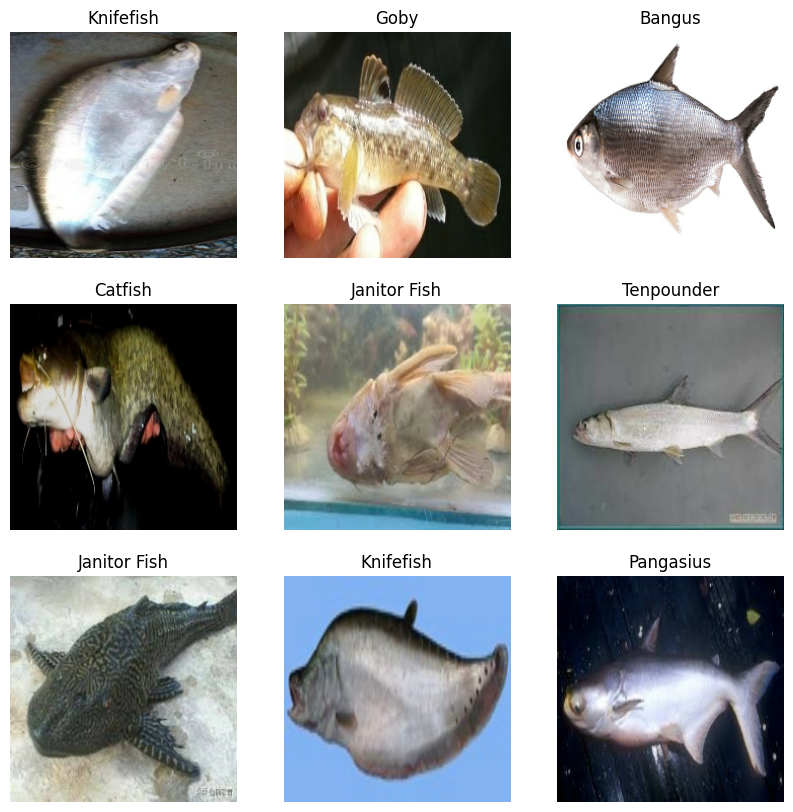

In [ ]:
# Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
# Display the images and their corresponding labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")
    plt.show()


Class Names: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish', 'Mudfish', 'Mullet', 'Pangasius', 'Perch', 'Scat Fish', 'Silver Barb', 'Silver Carp', 'Silver Perch', 'Snakehead', 'Tenpounder', 'Tilapia']


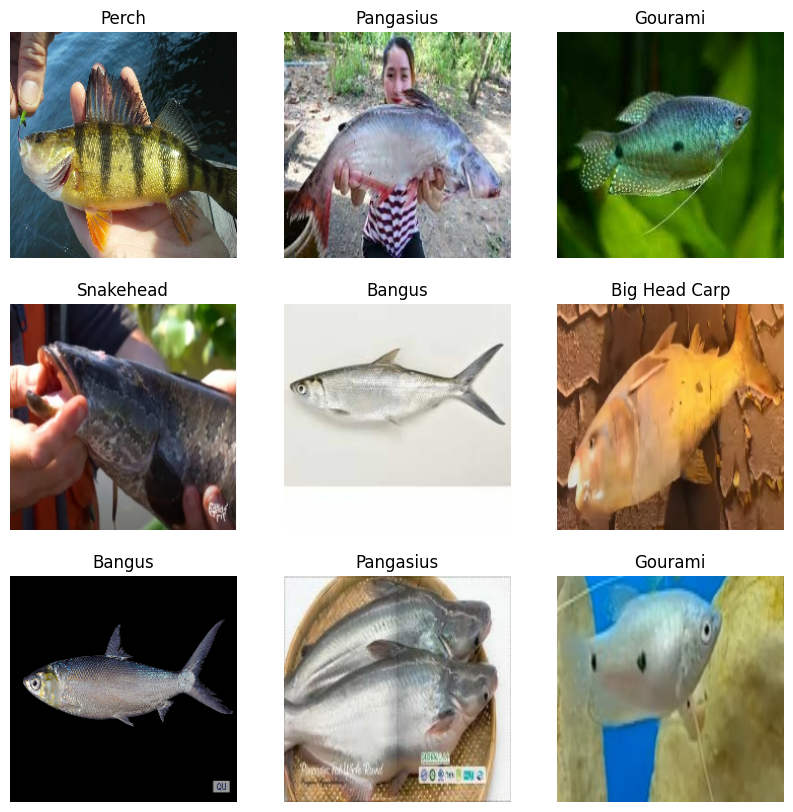

In [ ]:
#to show shuffling
import matplotlib.pyplot as plt
# Get the class names from the training set
class_names = training_set.class_names

# Display the class names
print("Class Names:", class_names)


# Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
    # Display the images and their corresponding labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")
    plt.show()

In [ ]:
#code to show label encoding
import tensorflow as tf
import matplotlib.pyplot as plt


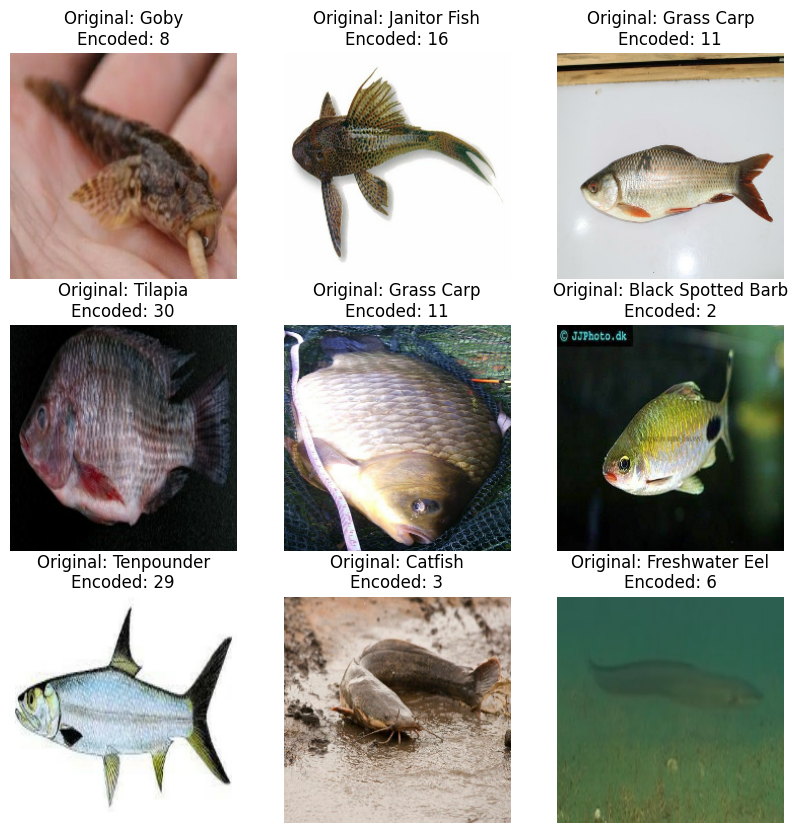

In [ ]:
# Define label encoding function
def label_encoding(label):
    class_names = training_set.class_names
    return class_names.index(label)

# Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
    # Display the images, their original labels, and their encoded labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        original_label = training_set.class_names[tf.argmax(labels[i]).numpy()]
        encoded_label = label_encoding(original_label)
        plt.title(f'Original: {original_label}\nEncoded: {encoded_label}')
        plt.axis("off")
    plt.show()

In [ ]:
#code to show interpolation
# Define label encoding function
def label_encoding(label):
    class_names = training_set.class_names
    return class_names.index(label)

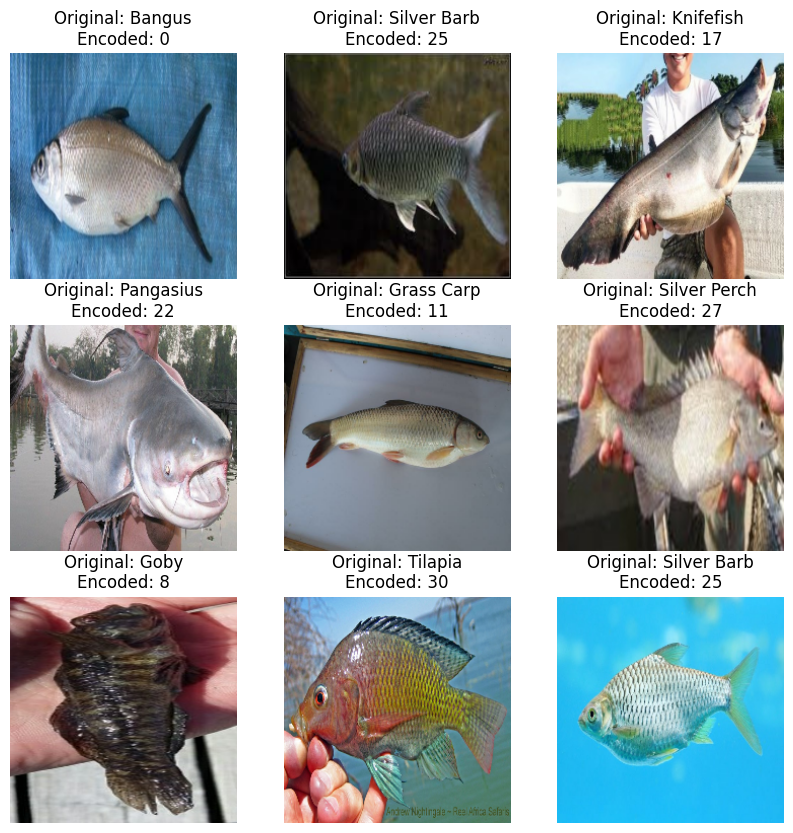

In [ ]:
# Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
    # Display the images, their original labels, and their encoded labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), interpolation='bilinear')  # Setting interpolation
        original_label = training_set.class_names[tf.argmax(labels[i]).numpy()]
        encoded_label = label_encoding(original_label)
        plt.title(f'Original: {original_label}\nEncoded: {encoded_label}')
        plt.axis("off")
    plt.show()

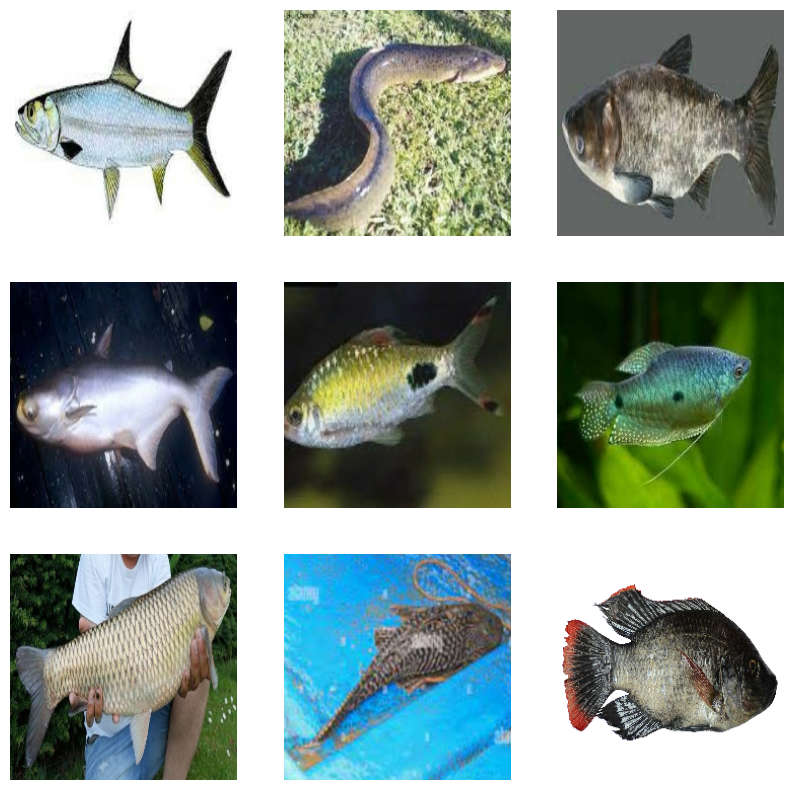

In [ ]:
#code to show normalization
# Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
    # Normalize the images
    normalized_images = images / 255.0

 # Display the normalized images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(normalized_images[i].numpy())
        #plt.title(f'Label: {labels[i].numpy()}')
        plt.axis("off")
    plt.show()



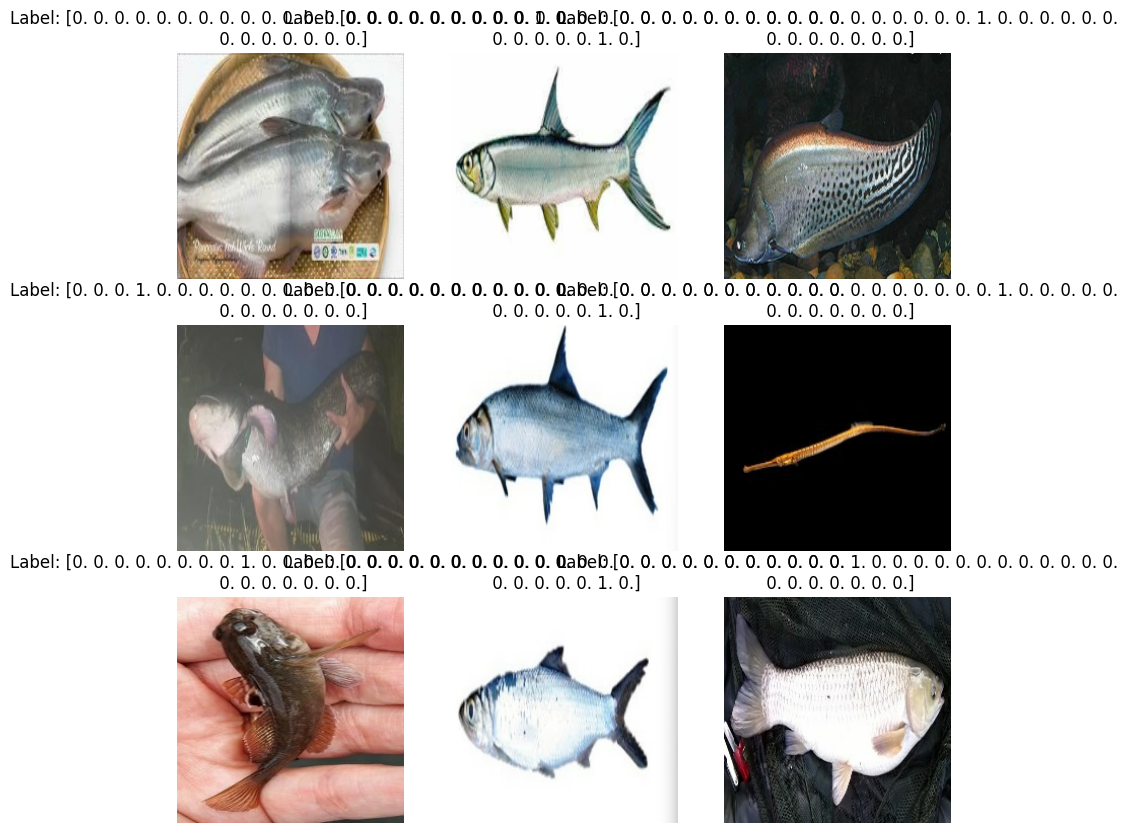

In [ ]:
 # Load a batch of images and labels from the training dataset
for images, labels in training_set.take(1):  # Take one batch
    # Normalize the images
    normalized_images = images / 255.0
 # Display the original images
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))  # Display original image
        plt.title(f'Label: {labels[i].numpy()}')
        plt.axis("off")
    plt.show()

In [28]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential # Sequential class is used to create layers for building neural network models.
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout


In [29]:
# Load the VGG19 base model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


80134624/80134624 [==============================] - 2s 0us/step


In [30]:
model = Sequential()



In [31]:
# Add the VGG19 base model
model.add(base_model)

In [32]:
# Add Global Average Pooling layer
model.add(GlobalAveragePooling2D())

In [33]:
# Add a fully connected layer with batch normalization and dropout
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))  # avoid overfitting

In [34]:
# Add the output layer (adjust the number of units for your dataset)
model.add(Dense(31, activation='softmax'))

In [35]:
#Optionally, I can freeze the VGG19 layers
for layer in base_model.layers:
    layer.trainable = False

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [37]:
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 31)                1

In [38]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=32) # also save traning history


Epoch 1/32
276/276 [==============================] - 89s 272ms/step - loss: 1.6376 - accuracy: 0.5637 - val_loss: 0.6322 - val_accuracy: 0.8208
Epoch 2/32
276/276 [==============================] - 64s 227ms/step - loss: 0.8117 - accuracy: 0.7614 - val_loss: 0.4245 - val_accuracy: 0.8870
Epoch 3/32
276/276 [==============================] - 69s 247ms/step - loss: 0.6172 - accuracy: 0.8208 - val_loss: 0.3874 - val_accuracy: 0.8855
Epoch 4/32
276/276 [==============================] - 64s 227ms/step - loss: 0.5380 - accuracy: 0.8389 - val_loss: 0.2991 - val_accuracy: 0.9204
Epoch 5/32
276/276 [==============================] - 64s 228ms/step - loss: 0.4577 - accuracy: 0.8609 - val_loss: 0.2604 - val_accuracy: 0.9258
Epoch 6/32
276/276 [==============================] - 65s 230ms/step - loss: 0.4241 - accuracy: 0.8696 - val_loss: 0.2300 - val_accuracy: 0.9382
Epoch 7/32
276/276 [==============================] - 65s 228ms/step - loss: 0.3783 - accuracy: 0.8818 - val_loss: 0.2112 - val_ac

In [39]:
# Evaluating Model
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

276/276 [==============================] - 50s 173ms/step - loss: 0.0310 - accuracy: 0.9949
Training accuracy: 0.9948915839195251


In [40]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

86/86 [==============================] - 16s 176ms/step - loss: 0.0970 - accuracy: 0.9811
Validation accuracy: 0.9810977578163147


In [ ]:
model.save('/content/drive/MyDrive/Project/Models/FinalVgg19_model.keras')

In [41]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report


In [42]:
# Load the saved model
saved_model_path = '/content/drive/MyDrive/Project/Models/FinalVgg19_model.keras'  # Specify the path to saved model
loaded_model = tf.keras.models.load_model(saved_model_path)


In [43]:
# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

In [44]:
# Iterate through the validation dataset and collect true and predicted labels
for images, labels in validation_set:
    true_labels.extend(np.argmax(labels, axis=1))  # Extract true labels
    predictions = loaded_model.predict(images)  # Predict labels
    predicted_labels.extend(np.argmax(predictions, axis=1))


1/1 [==============================] - 0s 195ms/step


In [45]:
# Compute the confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)


In [46]:
# Print the confusion matrix
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[ 51   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  63   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  61   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0  93   0   0   3   0   0   0   0   0   0   0   0   0   0   0
    0   0   1   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0  46   0   0   0   2   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   0   0   0   0  59   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0  82   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0 123   0   0   0   0   0   0   0   0   0   0
    0

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

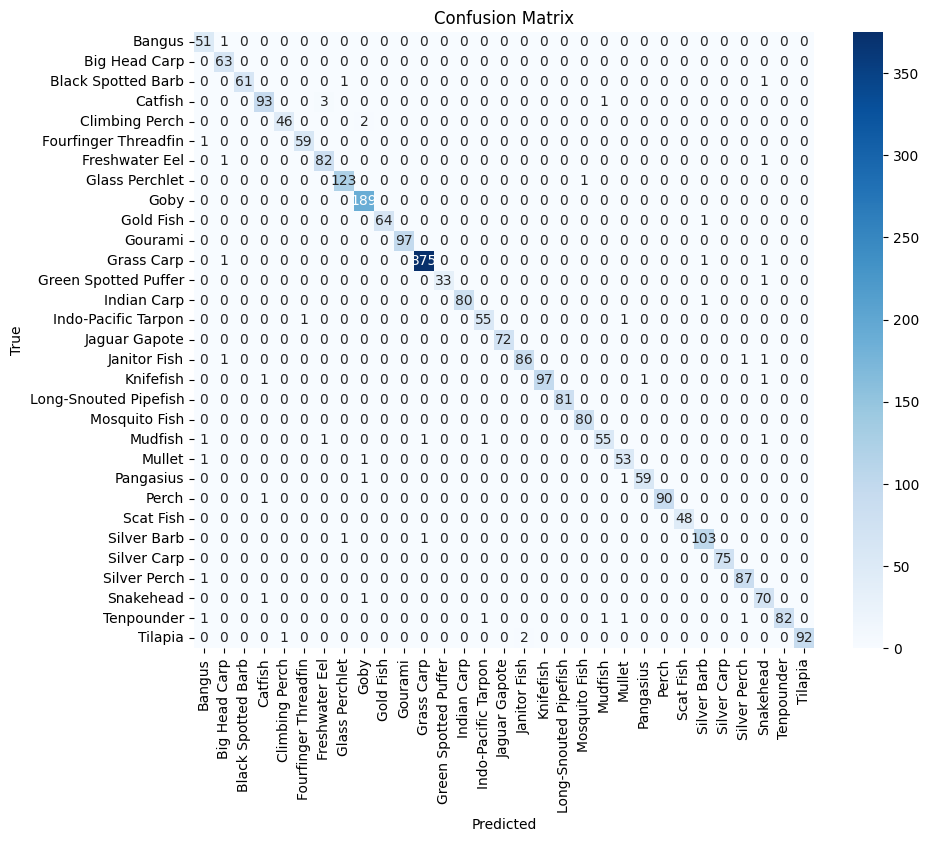

In [49]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=validation_set.class_names, yticklabels=validation_set.class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [50]:
# we can also print a classification report for additional metrics
report = classification_report(true_labels, predicted_labels, target_names=validation_set.class_names)
print("Classification Report:")
print(report)

Classification Report:
                       precision    recall  f1-score   support

               Bangus       0.91      0.98      0.94        52
        Big Head Carp       0.94      1.00      0.97        63
   Black Spotted Barb       1.00      0.97      0.98        63
              Catfish       0.97      0.96      0.96        97
       Climbing Perch       0.98      0.96      0.97        48
 Fourfinger Threadfin       0.98      0.98      0.98        60
       Freshwater Eel       0.95      0.98      0.96        84
       Glass Perchlet       0.98      0.99      0.99       124
                 Goby       0.97      1.00      0.99       189
            Gold Fish       1.00      0.98      0.99        65
              Gourami       1.00      1.00      1.00        97
           Grass Carp       0.99      0.99      0.99       378
 Green Spotted Puffer       1.00      0.97      0.99        34
          Indian Carp       1.00      0.99      0.99        81
  Indo-Pacific Tarpon       0.9

In [51]:
training_history.history #Return Dictionary of history

{'loss': [1.6376317739486694,
  0.8117125034332275,
  0.6171978116035461,
  0.5380216836929321,
  0.4576663374900818,
  0.42406362295150757,
  0.3783196210861206,
  0.33945944905281067,
  0.32120275497436523,
  0.3165808916091919,
  0.30284905433654785,
  0.28176432847976685,
  0.2729608118534088,
  0.26289084553718567,
  0.24526235461235046,
  0.2264033406972885,
  0.2338656485080719,
  0.22197325527668,
  0.21886377036571503,
  0.205098494887352,
  0.20713035762310028,
  0.21942760050296783,
  0.20058169960975647,
  0.19642290472984314,
  0.18337227404117584,
  0.19152604043483734,
  0.18245764076709747,
  0.15966521203517914,
  0.17036931216716766,
  0.1623261421918869,
  0.17084702849388123,
  0.17320600152015686],
 'accuracy': [0.5637416243553162,
  0.7613804340362549,
  0.8207514882087708,
  0.8389147520065308,
  0.8609376549720764,
  0.8695651888847351,
  0.8818253874778748,
  0.8952208161354065,
  0.8978317379951477,
  0.9028266668319702,
  0.9085026383399963,
  0.9128164649009

In [52]:
#recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [53]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [54]:
#Calculating Accuracy of Model Achieved on Validation set
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100)) # (-1) show use final Accuracy

Validation set Accuracy: 98.10977578163147 %


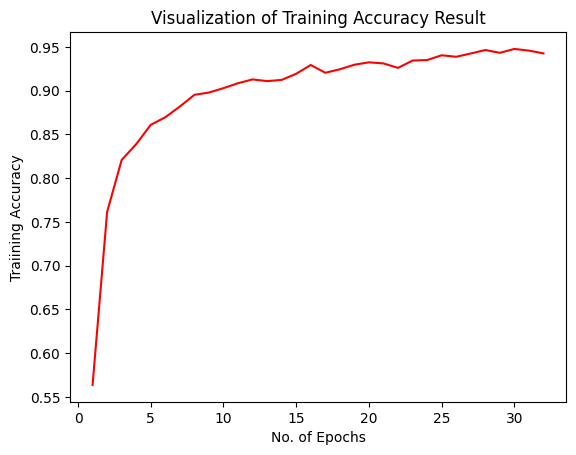

In [55]:
#Acuracy Visualization Training Visualization
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()


Text(0, 0.5, 'Test Accuracy')

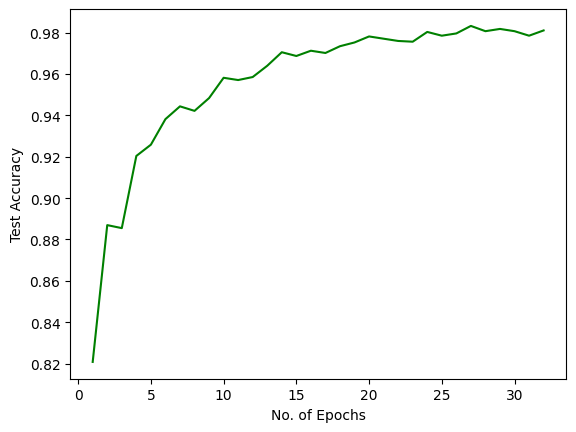

In [56]:
#Test Accuracy
plt.plot(epochs,training_history.history['val_accuracy'],color='Green')
plt.xlabel('No. of Epochs')
plt.ylabel('Test Accuracy')

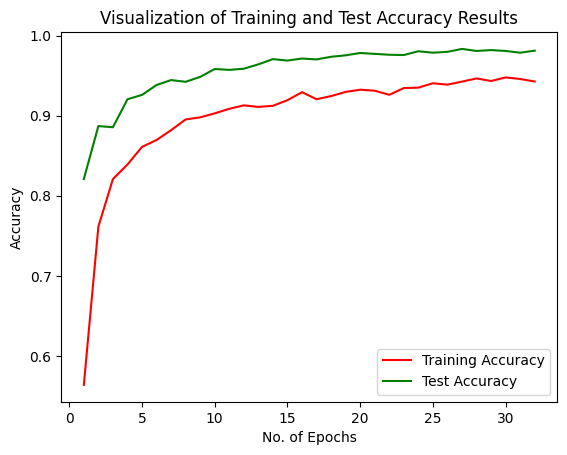

In [58]:
import matplotlib.pyplot as plt

epochs = [i for i in range(1, 33)]

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='Green', label='Test Accuracy')

plt.xlabel('No.of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Training and Test Accuracy Results')
plt.legend()
plt.show()